In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import joblib

In [23]:
model_path = "census_fullpipeline.pkl"
test_data_path = "census_dummy_50_logical.csv"
target_col = "Income"

model = joblib.load(model_path)
df_test = pd.read_csv(test_data_path)

x_new = df_test.copy()
y_actual = None
if target_col in x_new.columns:
    y_actual = x_new[target_col].copy()
    x_new.drop(columns=[target_col], inplace=True)

predictions = model.predict(x_new)
label_map = {0: "<=50K", 1: ">50K"}
predictions_readable = [label_map[int(p)] for p in predictions]

results = df_test.copy()
results["predicted_income"] = predictions_readable
if y_actual is not None:
    results["actual_income"] = y_actual

print(results)
results.to_csv("census_predictions_output.csv", index=False)


    Age         Workclass  Fnlwgt     Education  Education_num  \
0    35           Private  200117     Bachelors             13   
1    45           Private  229516       HS-grad              9   
2    62           Private  250091     Bachelors             13   
3    24         State-gov  247075       HS-grad              9   
4    22           Private  315524  Some-college             10   
5    23           Private  126945     Bachelors             13   
6    39  Self-emp-not-inc   29874  Some-college             10   
7    28           Private  115579     Assoc-voc             11   
8    51           Private   29580          11th              7   
9    44           Private   56483     Bachelors             13   
10   73  Self-emp-not-inc   89852       7th-8th              4   
11   24           Private  420779       HS-grad              9   
12   24           Private  255474          11th              7   
13   52           Private  241444       7th-8th              4   
14   43   

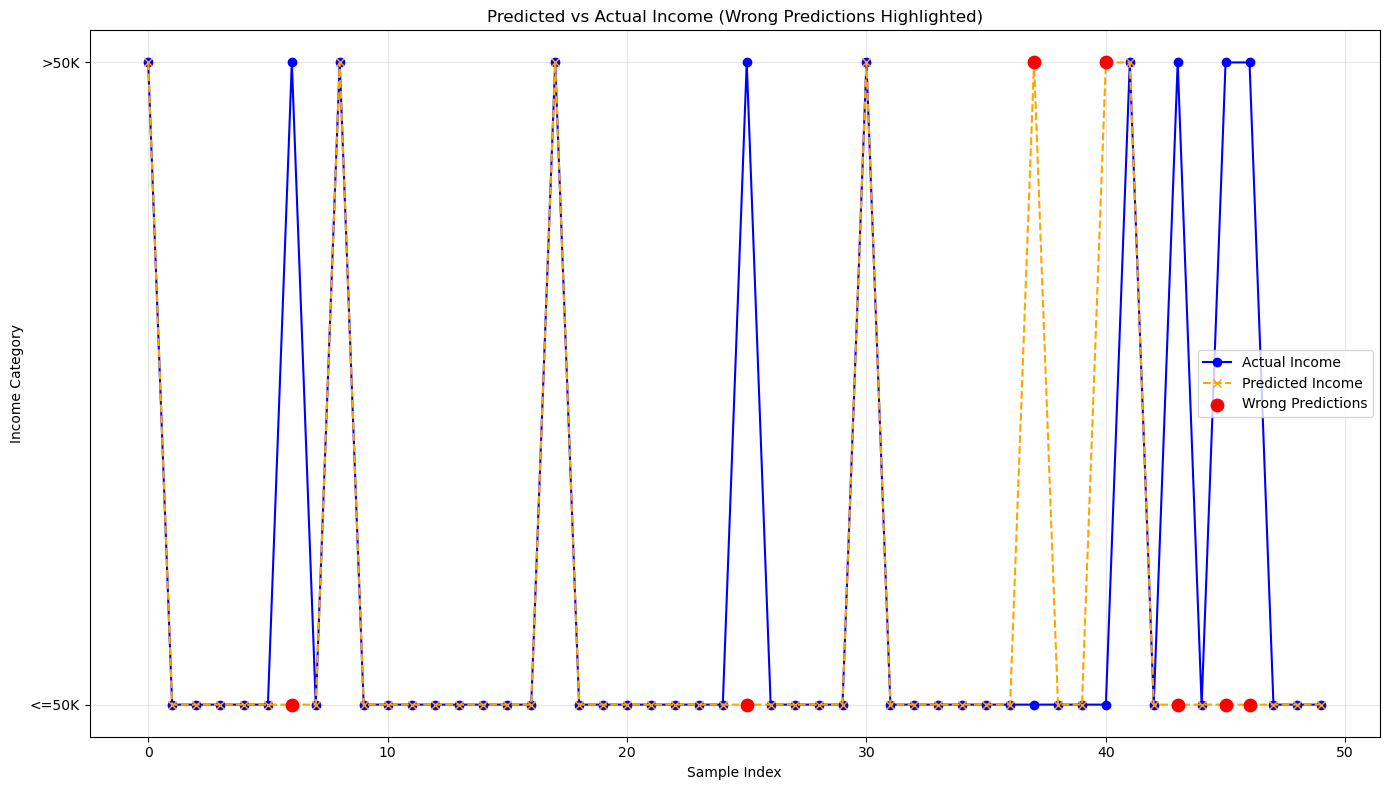

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("census_predictions_output.csv")
income_map = {"<=50K": 0, ">50K": 1}
df["actual_num"] = df["actual_income"].map(income_map)
df["pred_num"] = df["predicted_income"].map(income_map)
df["correct"] = df["actual_num"] == df["pred_num"]

plt.figure(figsize=(14, 8))

# Lines with markers
plt.plot(df.index, df["actual_num"], label="Actual Income",
         marker="o", linestyle="-", color="blue", markersize=6)
plt.plot(df.index, df["pred_num"], label="Predicted Income",
         marker="x", linestyle="--", color="orange", markersize=6)

# Highlight wrong predictions
wrong_points = df[~df["correct"]]
plt.scatter(wrong_points.index, wrong_points["pred_num"],
            color="red", label="Wrong Predictions", zorder=5, s=80)

plt.yticks([0, 1], ["<=50K", ">50K"])
plt.xlabel("Sample Index")
plt.ylabel("Income Category")
plt.title("Predicted vs Actual Income (Wrong Predictions Highlighted)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Prediction using XGBOOST was 86.66% 

In [25]:
print("Current dummy dataset prediction is : ", (41/50)*100) 

Current dummy dataset prediction is :  82.0
